In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [2]:
#importation du dataset
dataset=pd.read_csv("D:\COURS ET LIBRAIRIE\L2_INFO\TP\INFO CENTRE\Bon model\healthcare-dataset-stroke-data.csv")
print(dataset.shape)
dataset.head(-3)

(2998, 12)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2990,5032,Female,47.0,0,0,Yes,Private,Rural,65.01,21.7,formerly smoked,0
2991,5780,Female,47.0,0,0,Yes,Private,Urban,74.63,45.3,never smoked,0
2992,52236,Female,60.0,0,0,Yes,Private,Rural,230.78,40.2,never smoked,0
2993,59752,Male,62.0,0,0,Yes,Private,Urban,72.50,22.5,formerly smoked,0


In [3]:
# Information sur mon dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2998 entries, 0 to 2997
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 2998 non-null   int64  
 1   gender             2998 non-null   object 
 2   age                2998 non-null   float64
 3   hypertension       2998 non-null   int64  
 4   heart_disease      2998 non-null   int64  
 5   ever_married       2998 non-null   object 
 6   work_type          2998 non-null   object 
 7   Residence_type     2998 non-null   object 
 8   avg_glucose_level  2998 non-null   float64
 9   bmi                2859 non-null   float64
 10  smoking_status     2998 non-null   object 
 11  stroke             2998 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 281.2+ KB


0    91.694463
1     8.305537
Name: stroke, dtype: float64


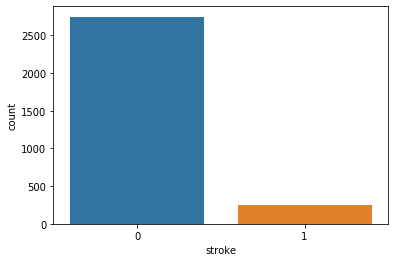

In [4]:
#sns.pairplot(dataset, hue='Outcome')
# repartition de donnees selon les classes
#classe desequilibree
sns.countplot(x='stroke',data=dataset)
print(dataset['stroke'].value_counts(normalize=True)*100)










# Analyse et exploration des donnees

### Correction des valeurs maquante(Nan)


In [5]:
# Verification des valeurs manquantes et matrice de correlation
print(dataset.isna().sum())

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  139
smoking_status         0
stroke                 0
dtype: int64


In [6]:
#description statistique sur les données
dataset.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2859.000000,2998.000000
mean,36252.218145,44.411514,0.105070,0.064376,108.029630,29.104547,0.083055
std,21114.881985,22.701715,0.306695,0.245463,46.603217,7.926297,0.276012
min,77.000000,0.080000,0.000000,0.000000,55.220000,10.300000,0.000000
25%,17362.750000,26.000000,0.000000,0.000000,77.767500,23.650000,0.000000
50%,36366.000000,47.000000,0.000000,0.000000,93.035000,28.200000,0.000000
75%,54549.750000,62.000000,0.000000,0.000000,116.085000,33.300000,0.000000
max,72918.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [7]:
## remplacement de valeur maquante par la moyenn
dataset.fillna(value={'bmi':dataset['bmi'].mean()},inplace=True)

### Correction des valeurs aberandes

ce sont des valeurs qui se détache du centre de gravité de la distribution (condition: Valeur<Q1-1,5*IQR ou Valeur>Q3+1,5*IQR)

In [8]:
# fonction qui Permet d'identifier les valeurs aberandes dans un dataset
# valeur si et seulement si valeur<quartil1-1,5*Interquartil ou valeur>quartil3+1,5*Interquartil
Data=dataset
def Fonction_Aberande(Dataset, Variable_Nom):
    IQR=Dataset[Variable_Nom].quantile(0.75)-Dataset[Variable_Nom].quantile(0.25) #valeur interquartil
    LOWER=Dataset[Variable_Nom].quantile(0.25)-IQR*1.5
    UPPER=Dataset[Variable_Nom].quantile(0.75)+IQR*1.5
    return Dataset[(Dataset[Variable_Nom]<LOWER) | (Dataset[Variable_Nom]>UPPER)]

In [9]:
print(f" age {Fonction_Aberande(Data,'age').shape}")
print(f" hypertension {Fonction_Aberande(Data,'hypertension').shape}")
print(f" heart_disease {Fonction_Aberande(Data,'heart_disease').shape}")
print(f" avg_glucose_level {Fonction_Aberande(Data,'avg_glucose_level').shape}")
print(f" bmi {Fonction_Aberande(Data,'bmi').shape}")

#print(f" gender  {Fonction_Aberande(Data,'gender').shape}")
#print(f" ever_married {Fonction_Aberande(Data,'ever_married').shape}")
#print(f" work_type  {Fonction_Aberande(Data,'work_type').shape}")
#print(f" smoking_status  {Fonction_Aberande(Data,'smoking_status').shape}")

 age (0, 12)
 hypertension (315, 12)
 heart_disease (193, 12)
 avg_glucose_level (391, 12)
 bmi (76, 12)


In [10]:
## correction hypertension

Iqr_hyper=dataset['hypertension'].quantile(0.75)-dataset['hypertension'].quantile(0.25)
UPPER=dataset['hypertension'].quantile(0.75)+1.5*Iqr_hyper
LOWER=dataset['hypertension'].quantile(0.25)-1.5*Iqr_hyper
dataset.loc[(dataset['hypertension']>UPPER,'hypertension')]=UPPER
dataset.loc[(dataset['hypertension']<LOWER,'hypertension')]=LOWER

print(f" hypertension {Fonction_Aberande(dataset,'hypertension').shape}")

 hypertension (0, 12)


In [11]:
Iqr_heart_disease =dataset['heart_disease'].quantile(0.75)-dataset['heart_disease'].quantile(0.25)
UPPER=dataset['heart_disease'].quantile(0.75)+1.5*Iqr_heart_disease 
LOWER=dataset['heart_disease'].quantile(0.25)-1.5*Iqr_heart_disease 
dataset.loc[(dataset['heart_disease']>UPPER,'heart_disease')]=UPPER
dataset.loc[(dataset['heart_disease']<LOWER,'heart_disease')]=LOWER

print(f" heart_disease  {Fonction_Aberande(dataset,'heart_disease').shape}")

 heart_disease  (0, 12)


In [12]:
Iqr_avg_glucose_level =dataset['avg_glucose_level'].quantile(0.75)-dataset['avg_glucose_level'].quantile(0.25)
UPPER=dataset['avg_glucose_level'].quantile(0.75)+1.5*Iqr_avg_glucose_level 
LOWER=dataset['avg_glucose_level'].quantile(0.25)-1.5*Iqr_avg_glucose_level 
dataset.loc[(dataset['avg_glucose_level']>UPPER,'avg_glucose_level')]=UPPER
dataset.loc[(dataset['avg_glucose_level']<LOWER,'avg_glucose_level')]=LOWER

print(f" avg_glucose_level  {Fonction_Aberande(dataset,'avg_glucose_level').shape}")

 avg_glucose_level  (0, 12)


In [13]:
Iqr_bmi =dataset['bmi'].quantile(0.75)-dataset['bmi'].quantile(0.25)
UPPER=dataset['bmi'].quantile(0.75)+1.5*Iqr_bmi 
LOWER=dataset['bmi'].quantile(0.25)-1.5*Iqr_bmi 
dataset.loc[(dataset['bmi']>UPPER,'bmi')]=UPPER
dataset.loc[(dataset['bmi']<LOWER,'bmi')]=LOWER

print(f" bmi  {Fonction_Aberande(dataset,'bmi').shape}")

 bmi  (0, 12)


In [14]:
#sns.pairplot(dataset, hue='Outcome')

# Preparation des donnees

### Codage des variables qualitatives

In [15]:
dataset

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0.0,0.0,Yes,Private,Urban,173.56125,36.600000,formerly smoked,1
1,51676,Female,61.0,0.0,0.0,Yes,Self-employed,Rural,173.56125,29.104547,never smoked,1
2,31112,Male,80.0,0.0,0.0,Yes,Private,Rural,105.92000,32.500000,never smoked,1
3,60182,Female,49.0,0.0,0.0,Yes,Private,Urban,171.23000,34.400000,smokes,1
4,1665,Female,79.0,0.0,0.0,Yes,Self-employed,Rural,173.56125,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2993,59752,Male,62.0,0.0,0.0,Yes,Private,Urban,72.50000,22.500000,formerly smoked,0
2994,47005,Female,47.0,0.0,0.0,Yes,Private,Urban,68.48000,21.300000,never smoked,0
2995,4750,Male,78.0,0.0,0.0,Yes,Private,Urban,85.03000,26.100000,formerly smoked,0
2996,65127,Female,35.0,0.0,0.0,Yes,Private,Urban,80.76000,28.800000,smokes,0


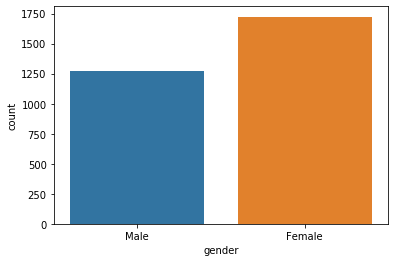

In [16]:
sns.countplot(x='gender',data=dataset)


In [17]:
dataset['gender'].replace({'Male':0,'Female':1,'Other':2},inplace=True)

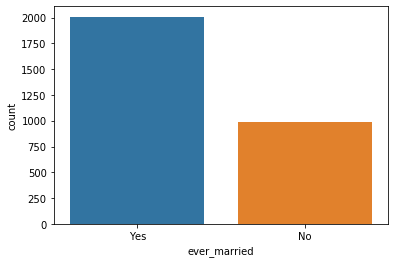

In [18]:
sns.countplot(x='ever_married',data=dataset)

In [19]:
dataset['ever_married'].replace({'No':0,'Yes':1},inplace=True)

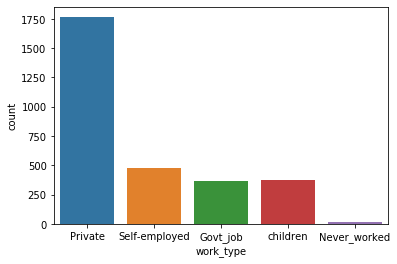

In [20]:
sns.countplot(x='work_type',data=dataset)

In [21]:
dataset['work_type'].replace({'Private':0,'Self-employed':1,'Govt_job':2,'children':3,'Never_worked':4},inplace=True)

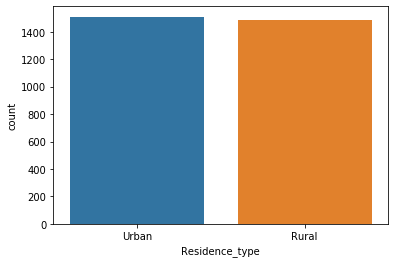

In [22]:
sns.countplot(x='Residence_type',data=dataset)

In [23]:
dataset['Residence_type'].replace({'Urban':0,'Rural':1},inplace=True)

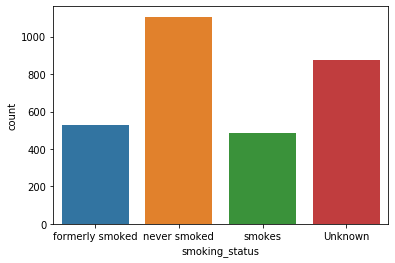

In [24]:
sns.countplot(x='smoking_status',data=dataset)

In [25]:
dataset['smoking_status'].replace({'formerly smoked':0,'never smoked':1,'smokes':2,'Unknown':3},inplace=True)

In [26]:
dataset

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,0,67.0,0.0,0.0,1,0,0,173.56125,36.600000,0,1
1,51676,1,61.0,0.0,0.0,1,1,1,173.56125,29.104547,1,1
2,31112,0,80.0,0.0,0.0,1,0,1,105.92000,32.500000,1,1
3,60182,1,49.0,0.0,0.0,1,0,0,171.23000,34.400000,2,1
4,1665,1,79.0,0.0,0.0,1,1,1,173.56125,24.000000,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2993,59752,0,62.0,0.0,0.0,1,0,0,72.50000,22.500000,0,0
2994,47005,1,47.0,0.0,0.0,1,0,0,68.48000,21.300000,1,0
2995,4750,0,78.0,0.0,0.0,1,0,0,85.03000,26.100000,0,0
2996,65127,1,35.0,0.0,0.0,1,0,0,80.76000,28.800000,2,0


### Creation des splits et Normalisation

#Creation des donnees d'entrainement(60%), validation(20%) et test(20%)
#Permet de ramener les donnees sur meme echele statistique

In [27]:
#dataset_norma=(dataset-Mean)/Ecart
#dataset_norma

In [28]:
# Division de targuet et features
X=dataset.drop('stroke', axis=1)
# standardisation de donnees
#Mean=X.mean()
#Ecart=X.std()
#dataset_norma=(X-Mean)/Ecart
Y=dataset['stroke']

In [29]:
# Creation des donnees d'entrainement(60%), validation(20%) et test(20%)
seed=111
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.40,random_state=seed, stratify=Y)
print(X_train.shape)
print(X_test.shape)
X_val,X_test,Y_val,Y_test=train_test_split(X_test,Y_test, test_size=0.50,random_state=seed, stratify=Y_test)
#X_train

(1798, 11)
(1200, 11)


## Resolution de probleme des classes deséquilibrées

Ici on requilibre les classes

In [30]:
Y_train.value_counts(normalize=True)

0    0.91713
1    0.08287
Name: stroke, dtype: float64

In [31]:
# Resolution de probleme de sur-echantillionnage et sous-echantillionnage
from sklearn.utils import resample

X_echant=X_train
X_echant['stroke']=Y_train.values
X_echant.shape

# Sur-Echantillionnage

Classe_minorite=X_echant[X_echant.stroke==1]
Classe_majorite=X_echant[X_echant.stroke==0]

minorite_remontada=resample(Classe_minorite, replace=True, 
                            n_samples=len(Classe_majorite))
Remontada=pd.concat([Classe_majorite, minorite_remontada], axis=0)

X_train_up=Remontada.drop(['stroke'],axis=1)
Y_train_up=Remontada['stroke']
print(Y_train_up.value_counts(normalize=True))
#sns.countplot(x='stroke',data=Remontada)


1    0.5
0    0.5
Name: stroke, dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


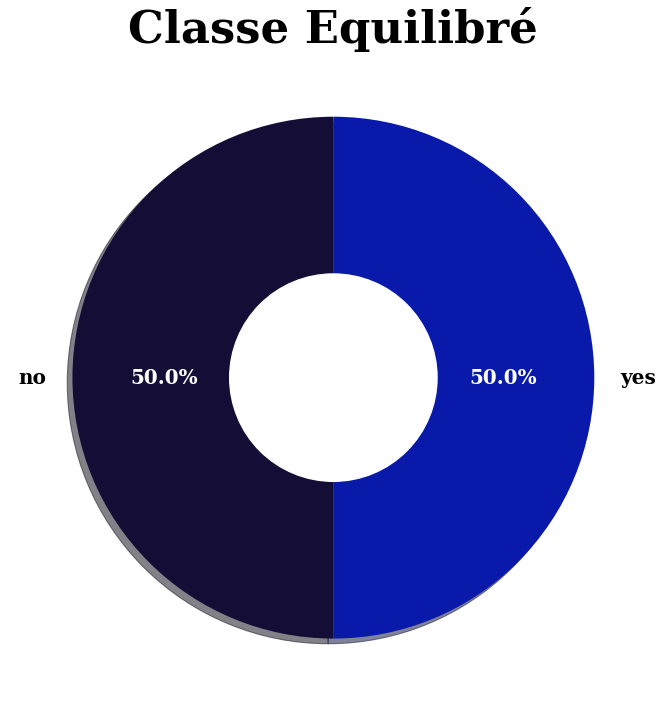

In [32]:
pie_colors = ('#140E36', '#091AAB')
pred_classes = Y_train_up.value_counts()
plt.figure(figsize=(17, 12))
patches, texts, pcts = plt.pie(pred_classes,
                               labels=['no', 'yes'],
                               colors=pie_colors,
                               pctdistance=0.65,
                               shadow=True,
                               startangle=90,
                               autopct='%1.1f%%',
                               textprops={'fontsize': 20,
                                          'color': 'black',
                                          'weight': 'bold',
                                          'family': 'serif'})
plt.setp(pcts, color='white')

hfont = {'fontname':'serif', 'weight': 'bold'}
plt.title('Classe Equilibré', size=45, **hfont)

centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

In [33]:
X_train_up

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
2865,51963,0,58.0,0.0,0.0,1,0,0,69.24000,27.6,1
1876,57618,1,47.0,0.0,0.0,1,1,1,140.39000,25.5,1
2593,70537,0,5.0,0.0,0.0,0,3,1,74.79000,19.4,3
2751,19209,1,48.0,0.0,0.0,1,2,1,173.56125,38.1,0
1359,36226,0,4.0,0.0,0.0,0,3,0,132.41000,16.3,3
...,...,...,...,...,...,...,...,...,...,...,...
192,36255,0,59.0,0.0,0.0,1,1,1,118.03000,35.5,2
95,2458,1,78.0,0.0,0.0,1,0,1,173.56125,32.3,1
225,39186,1,57.0,0.0,0.0,1,0,0,173.56125,31.0,3
225,39186,1,57.0,0.0,0.0,1,0,0,173.56125,31.0,3


In [34]:
X_val.shape

(600, 11)

# Modelisation 


0.9016666666666666


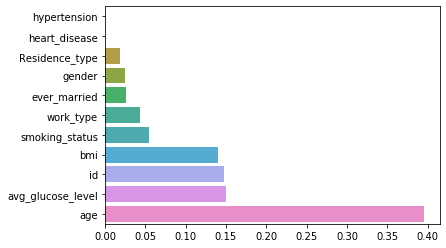

In [35]:
## determination variable important pour determiner si un patient a le diabete
from sklearn.ensemble import RandomForestClassifier
#from sklearn.metrics import accuracy_score

FR=RandomForestClassifier(random_state=seed)
FR.fit(X_train_up,Y_train_up)
print(accuracy_score(Y_val, FR.predict(X_val)))
Val_Serie=pd.Series(FR.feature_importances_,index=X_train_up.columns).sort_values(ascending=True)
sns.barplot(x=Val_Serie, y=Val_Serie.index)
plt.show()

def plot_conf_mat(model, X_test, y_test):

    y_pred = model.predict(X_test)
    matrix = confusion_matrix(y_pred, y_test)

    df_cm = pd.DataFrame(matrix, index = ['Stroke', 'Normal'],
                                columns = ['Stroke', 'Normal'])
    plt.figure(figsize = (12,8))
    sns.heatmap(df_cm,
                annot=True,
                cmap='Blues',
                fmt='.5g',
                annot_kws={"size": 20}).set_title('Confusion matrix', fontsize = 35, y=1.05, **hfont)
    plt.xlabel('Predicted values', fontsize = 20, **hfont)
    plt.ylabel('True values', fontsize = 20, **hfont)
    plt.show()


In [36]:
## Regression logistique
## entrainnement et validation du modele
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
lr = LogisticRegression(random_state=seed)
lr_hyper={'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}
lr_cv=GridSearchCV(lr, lr_hyper, cv=5)
lr_cv.fit(X_train_up,Y_train_up)
print(lr_cv.best_score_)
print(lr_cv.best_estimator_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7286126822090403
LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=111, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [37]:
## Foret aleatoire
from sklearn.ensemble import RandomForestClassifier


RF=RandomForestClassifier(random_state=seed)
RF_hyper={
    'n_estimators':[5,10,15,20,25,50,100,200],
    'max_depth':[None,2,5,10,15,20]
}
RF_CV=GridSearchCV(RF,RF_hyper,cv=5)
RF_CV.fit(X_train_up,Y_train_up)
print(RF_CV.best_score_)
print(RF_CV.best_estimator_)


0.9845330390398676
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=111,
                       verbose=0, warm_start=False)


In [47]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier


KNN=KNeighborsClassifier()
KNN_hyper={
    'n_neighbors':[1,10,20,30,50,60]
}
KNN_CV=GridSearchCV(KNN,KNN_hyper,cv=5)
KNN_CV.fit(X_train_up,Y_train_up)
print(KNN_CV.best_score_)
print(KNN_CV.best_estimator_)


0.9599774681565272
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')


In [39]:
# Bagging classifier

from sklearn.ensemble import BaggingClassifier

bc=BaggingClassifier(random_state=seed)
bc_hyper={
    'n_estimators':[5,10,15,20,25,50,100,200]
}
bc_CV=GridSearchCV(bc,bc_hyper,cv=5)
bc_CV.fit(X_train_up,Y_train_up)
print(bc_CV.best_score_)
print(bc_CV.best_estimator_)


0.9748310111739549
BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=111, verbose=0,
                  warm_start=False)


# Evaluation de modele

 _cette etape permet de trouver le meilleur modele par rapport au aux modeles utilisé precedent_

In [48]:
def Evaluation_modele(model,features,labels):
    pred=model.predict(features)
    score=accuracy_score(Y_val,pred) # Nota: chaque modele a sa metrique
    print('Score  :', round(score,3))
    
models=[lr_cv.best_estimator_, 
        RF_CV.best_estimator_, 
        KNN_CV.best_estimator_,
        bc_CV.best_estimator_]
for model in models:
    print('Model :'+str(model))
    Evaluation_modele(model,X_val, Y_val)
    
    print('-'*90)

Model :LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=111, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Score  : 0.682
------------------------------------------------------------------------------------------
Model :RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=111,
                       verbose=0, warm_start=False)
Score  : 0.